In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df1.shape

(1459, 80)

In [7]:
# Separating target variable
y = df['SalePrice']
df2 = df.drop('SalePrice', axis = 1)

In [8]:
# Concatenating train and test set
house = pd.concat([df2, df1],keys = ['train', 'test'], axis = 0)
house.reset_index(inplace = True, drop = True)

In [9]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
house.shape

(2919, 80)

In [11]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [12]:
# Getting numeric features
col = [columns for columns in house.columns if house[columns].dtype != 'O']
df_num = house[col]

In [13]:
df_num.shape

(2919, 37)

In [14]:
# Ckecking correlation
corr = df.corr()['SalePrice'].sort_values(ascending = False).to_frame()
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [15]:
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [16]:
df_num.nunique()/len(df_num) * 100

Id               100.000000
MSSubClass         0.548133
LotFrontage        4.385063
LotArea           66.837958
OverallQual        0.342583
OverallCond        0.308325
YearBuilt          4.042480
YearRemodAdd       2.089757
MasVnrArea        15.210689
BsmtFinSF1        33.949983
BsmtFinSF2         9.318260
BsmtUnfSF         38.883179
TotalBsmtSF       36.245289
1stFlrSF          37.101747
2ndFlrSF          21.754025
LowQualFinSF       1.233299
GrLivArea         44.261733
BsmtFullBath       0.137033
BsmtHalfBath       0.102775
FullBath           0.171292
HalfBath           0.102775
BedroomAbvGr       0.274066
KitchenAbvGr       0.137033
TotRmsAbvGrd       0.479616
Fireplaces         0.171292
GarageYrBlt        3.528606
GarageCars         0.205550
GarageArea        20.657760
WoodDeckSF        12.983899
OpenPorchSF        8.633094
EnclosedPorch      6.269270
3SsnPorch          1.062008
ScreenPorch        4.145255
PoolArea           0.479616
MiscVal            1.301816
MoSold             0

In [17]:
# We will separate temporal features
temp_feat = ['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd']
df_temp = house[temp_feat]
df_num = df_num.drop(temp_feat, axis = 1)

In [18]:
# if unique features are less than 2% of all values convert them to categorical and plot bar plot
disc = []
sns.set()
def ucbp(data):
    for features in data.columns:
        if data[features].nunique()/len(data) * 100 < 2:
            disc.append(features)
            sns.barplot(data[features].value_counts().index,
                        data[features].value_counts().values, 
                        ci = None)
            plt.xlabel(features)
            plt.ylabel('Counts')
            plt.show()

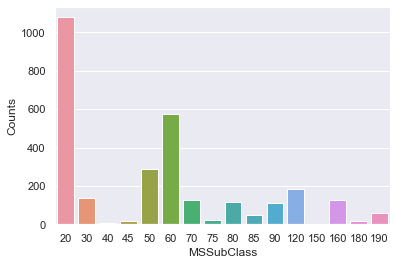

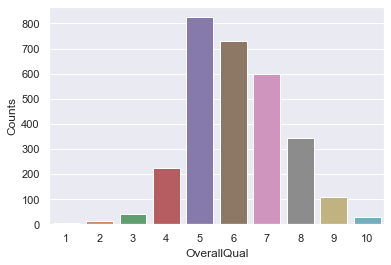

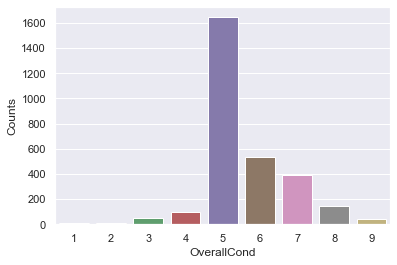

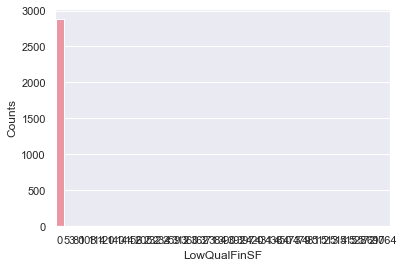

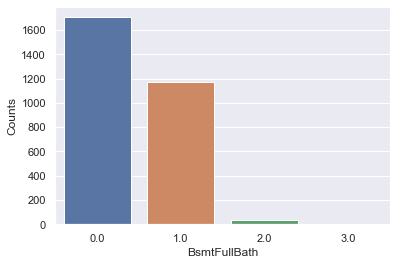

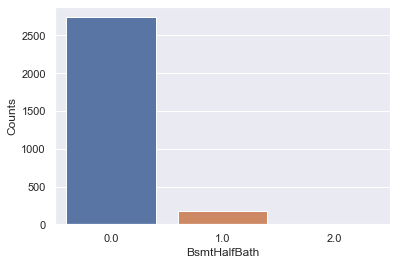

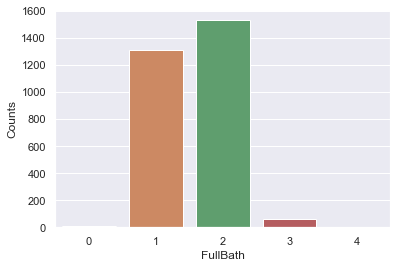

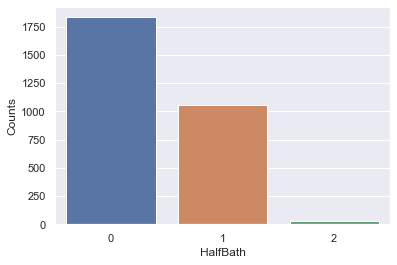

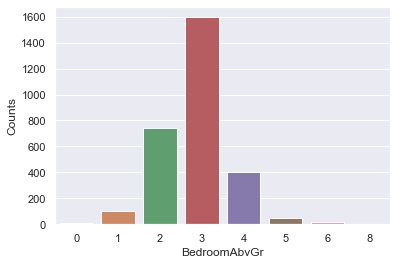

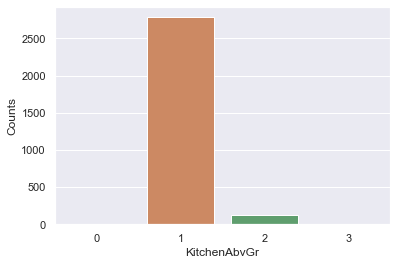

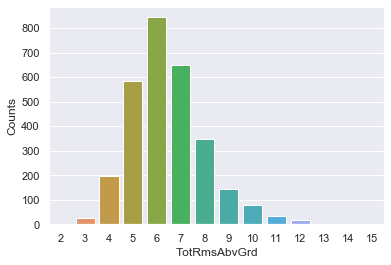

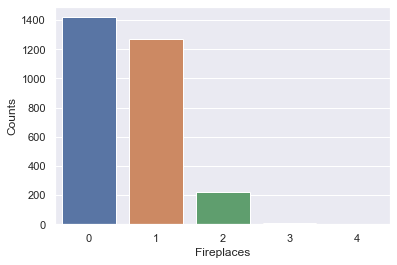

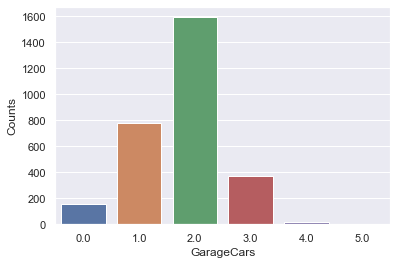

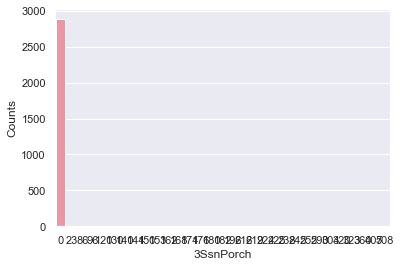

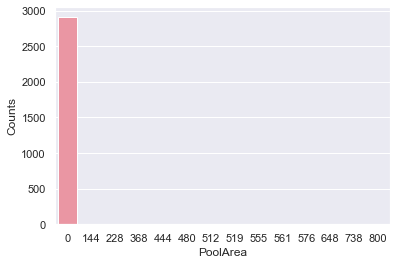

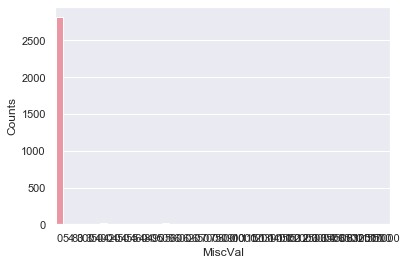

In [19]:
ucbp(df_num)

Features such as MiscVal, PoolArea, 3SsnPorch, LowQualFinSF have predominantly 0 value for almost all of the houses, thus acting as a constant we will remove these features.

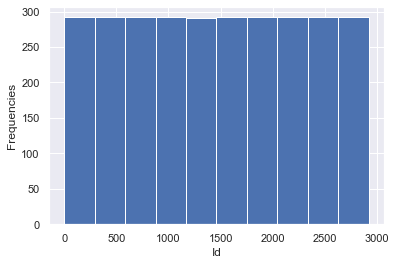

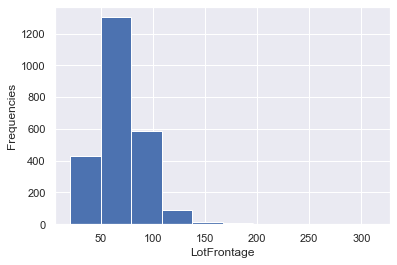

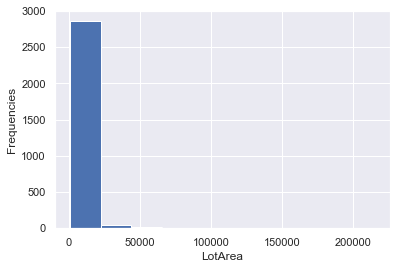

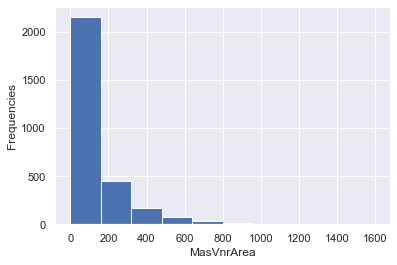

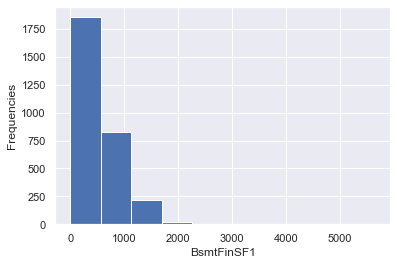

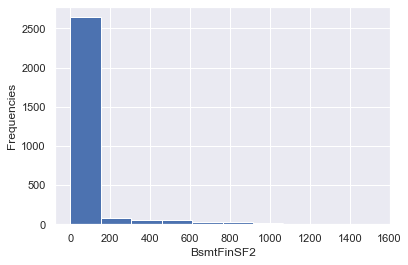

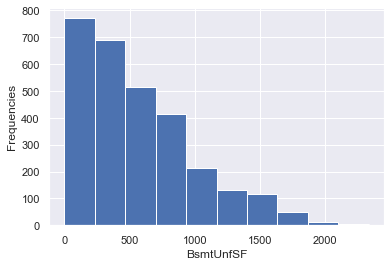

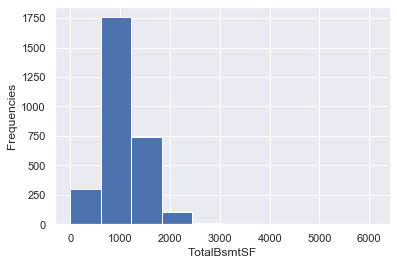

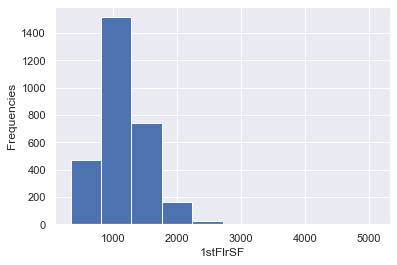

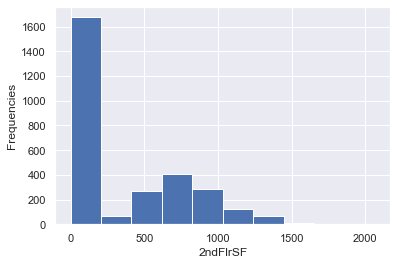

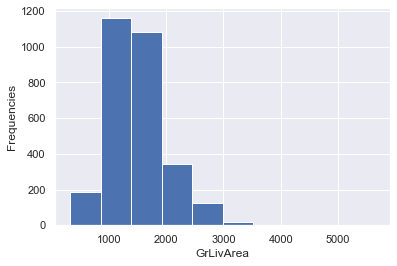

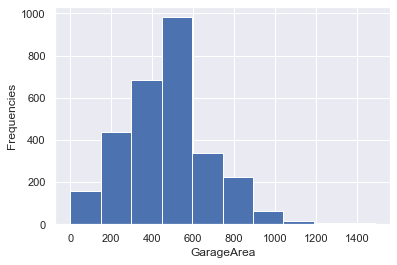

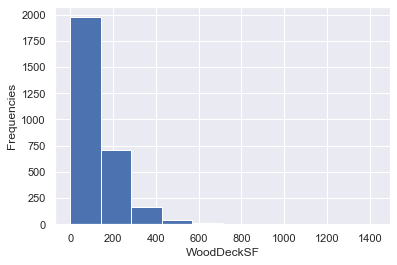

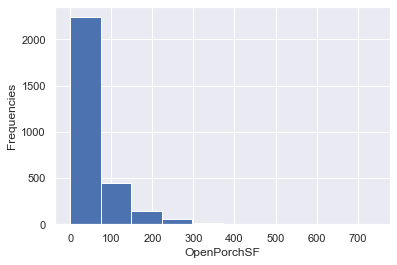

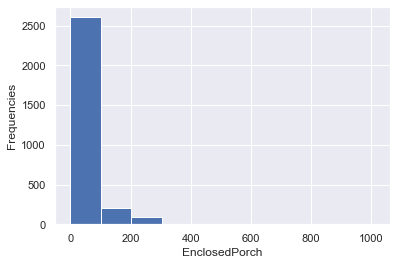

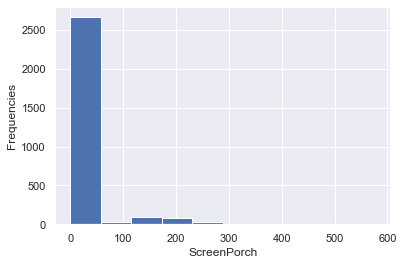

In [20]:
con = []
def cont(data):
    for features in data.columns:
        if data[features].nunique()/len(data) * 100 >= 2:
            con.append(features)
            plt.hist(data[features])
            plt.xlabel(features)
            plt.ylabel('Frequencies')
            plt.show()
cont(df_num)

As observed from histograms features are skewed. Will normalize them.

In [21]:
# Id feature is not of much use in model building, so will remove it
test_id = df1['Id']
house.drop('Id', axis = 1, inplace = True)

In [22]:
obj = [columns for columns in house.columns if house[columns].dtype == 'O']
df_obj = house[obj]
df_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
df_obj.shape

(2919, 43)

In [24]:
for features in df_obj.columns:
    print(df_obj[features].value_counts())
    print('-' * 100)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
----------------------------------------------------------------------------------------------------
Pave    2907
Grvl      12
Name: Street, dtype: int64
----------------------------------------------------------------------------------------------------
Grvl    120
Pave     78
Name: Alley, dtype: int64
----------------------------------------------------------------------------------------------------
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
----------------------------------------------------------------------------------------------------
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
----------------------------------------------------------------------------------------------------
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
------------------------------------------------------------------

In [25]:
# Checking for null values
(df_obj.isnull().sum()/len(df_obj) * 100).round(2)

MSZoning          0.14
Street            0.00
Alley            93.22
LotShape          0.00
LandContour       0.00
Utilities         0.07
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.03
Exterior2nd       0.03
MasVnrType        0.82
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.77
BsmtCond          2.81
BsmtExposure      2.81
BsmtFinType1      2.71
BsmtFinType2      2.74
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.03
KitchenQual       0.03
Functional        0.07
FireplaceQu      48.65
GarageType        5.38
GarageFinish      5.45
GarageQual        5.45
GarageCond        5.45
PavedDrive        0.00
PoolQC           99.66
Fence            80.44
MiscFeature      96.40
SaleType          0.03
SaleCondition     0.00
dtype: floa

We will drop all features with more than 40% missing values.

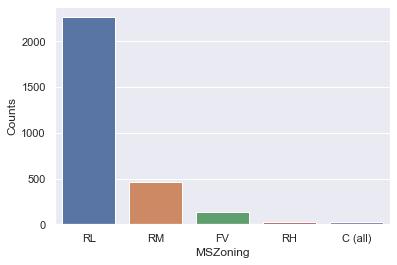

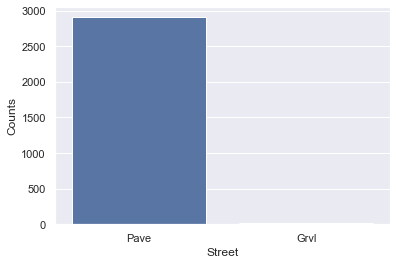

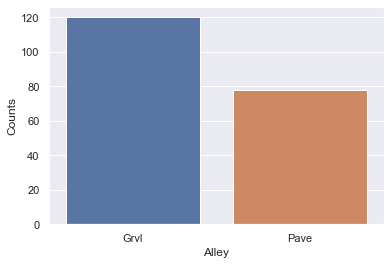

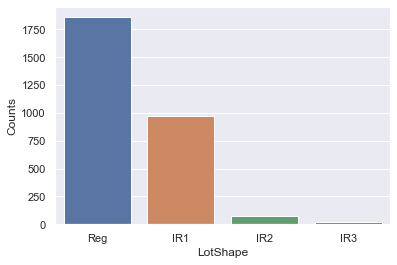

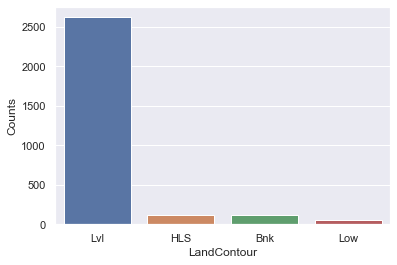

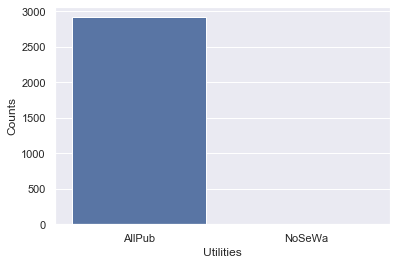

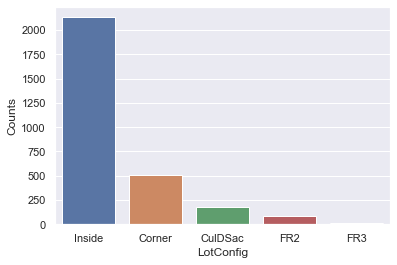

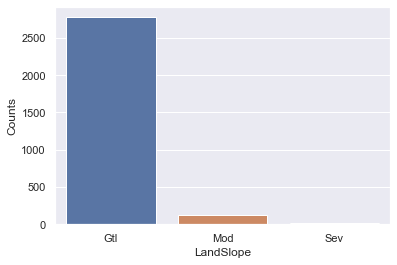

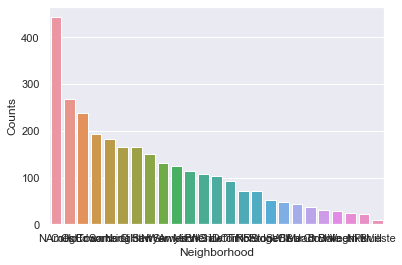

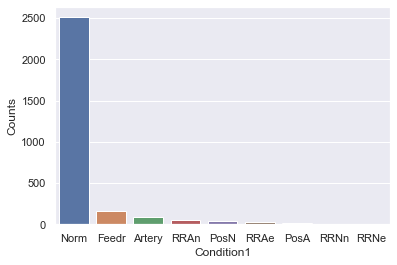

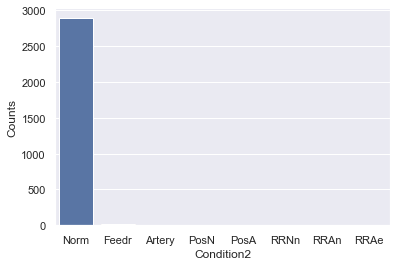

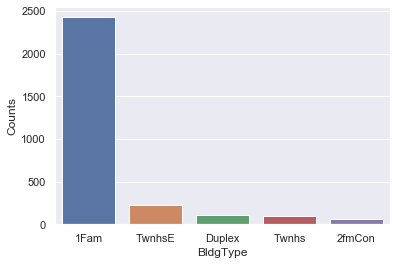

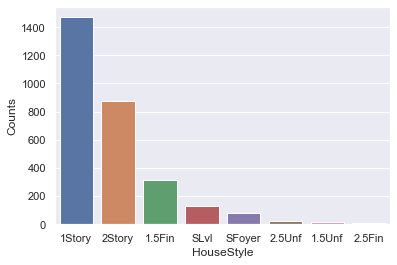

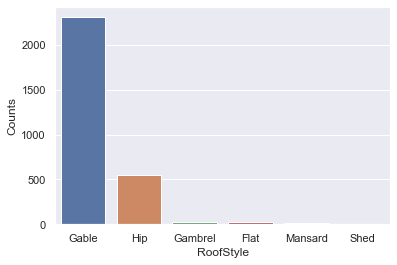

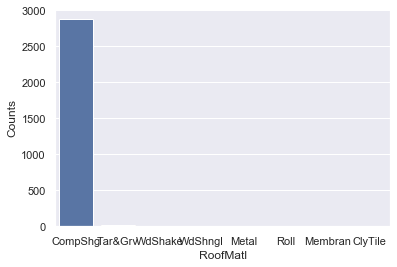

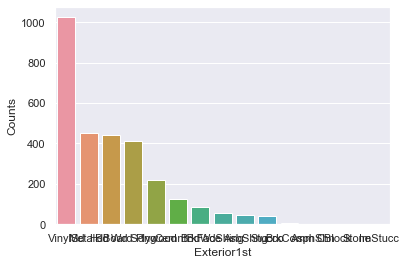

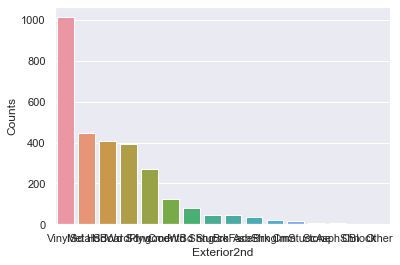

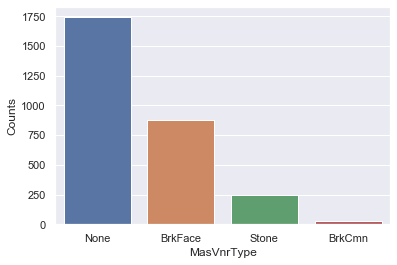

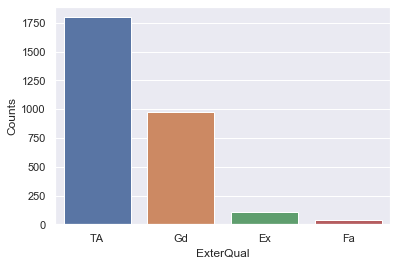

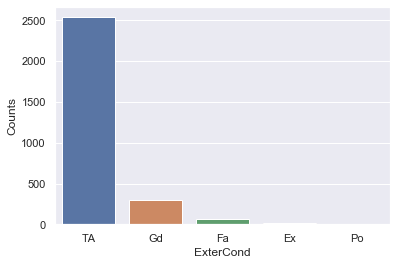

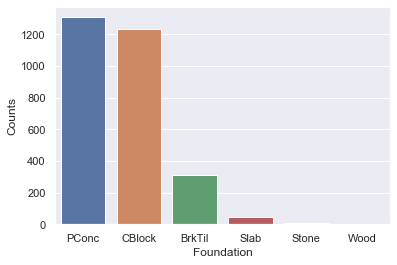

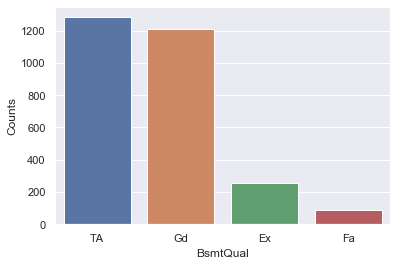

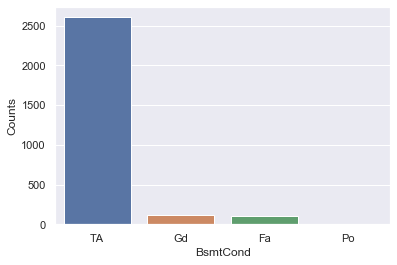

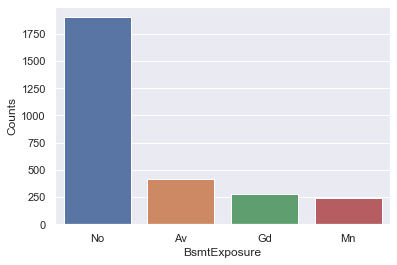

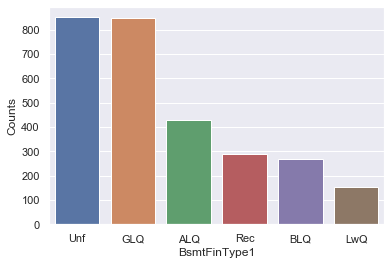

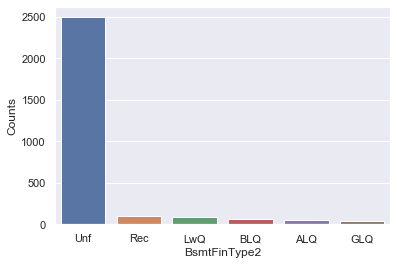

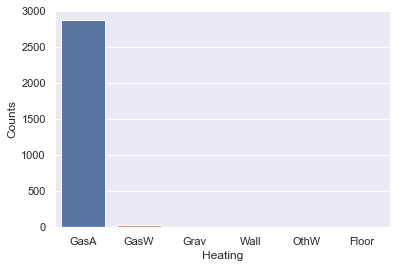

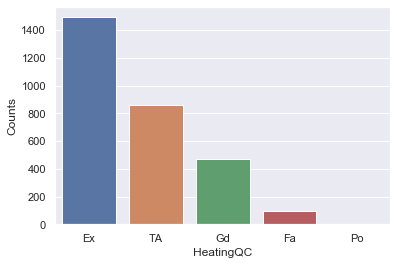

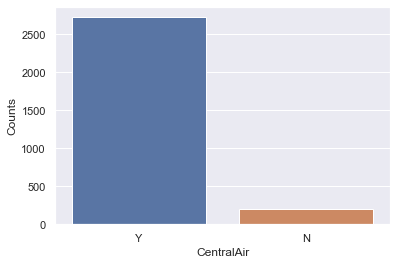

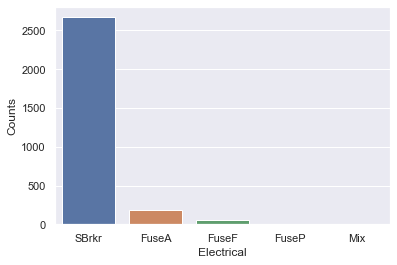

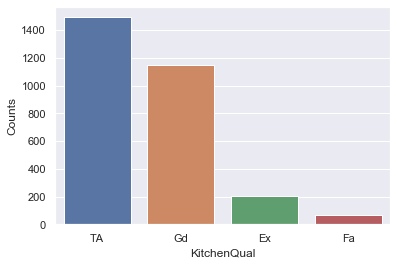

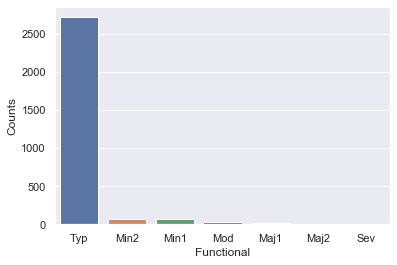

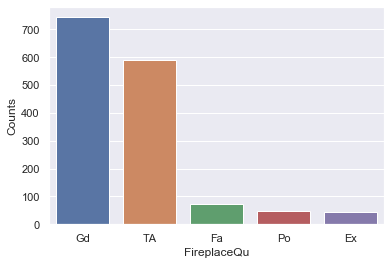

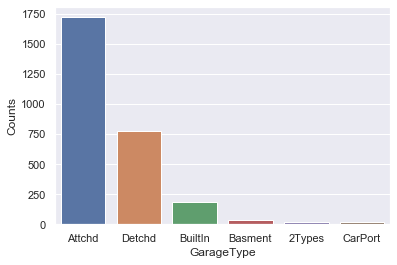

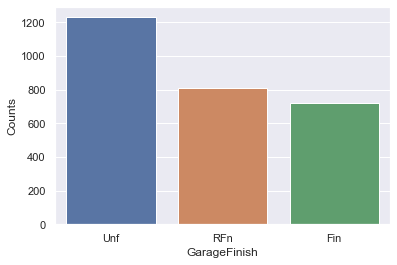

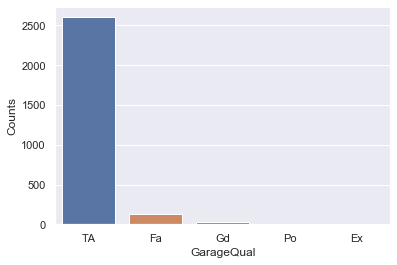

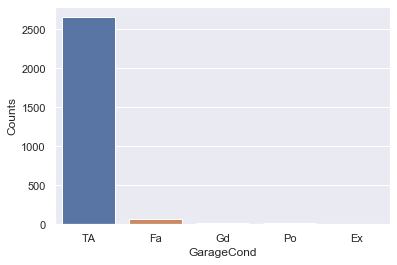

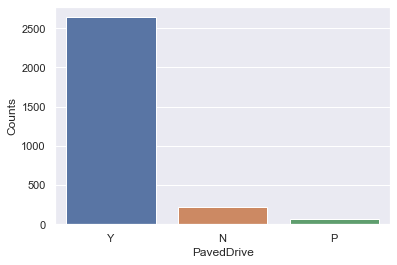

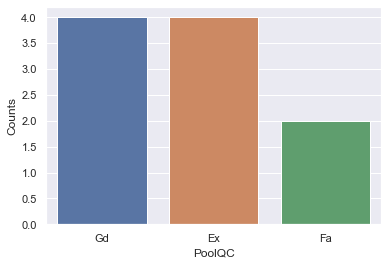

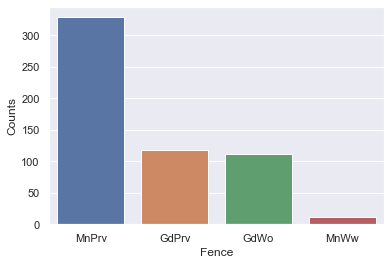

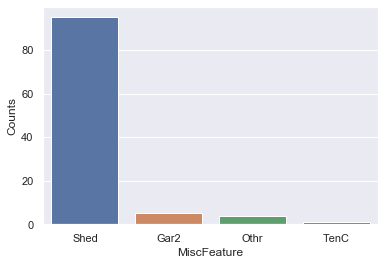

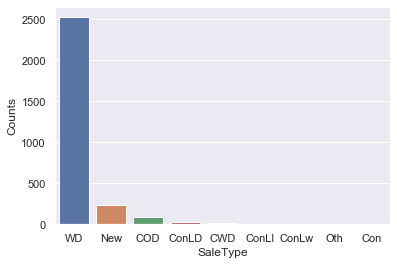

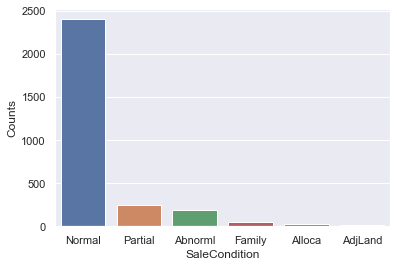

In [26]:
for features in df_obj.columns:
    sns.barplot(df_obj[features].value_counts().index, df_obj[features].value_counts().values,
                                                                      ci = None)
    plt.xlabel(features)
    plt.ylabel('Counts')
    plt.show()

Features such as Street, Utilities, Condition2, RoofMatl, Heating are almost completely made up of just one category thus acting as constants. Will remove these features.

In [27]:
# Checking our temporal features.
df_temp.head()

,MoSold,YrSold,GarageYrBlt,YearBuilt,YearRemodAdd
0,2,2008,2003.0,2003,2003
1,5,2007,1976.0,1976,1976
2,9,2008,2001.0,2001,2002
3,2,2006,1998.0,1915,1970
4,12,2008,2000.0,2000,2000


In [28]:
df_temp.isnull().sum()

MoSold            0
YrSold            0
GarageYrBlt     159
YearBuilt         0
YearRemodAdd      0
dtype: int64

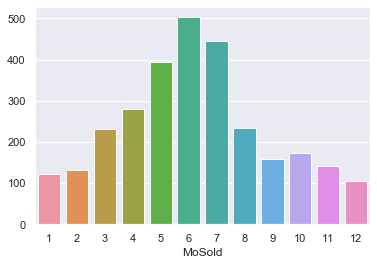

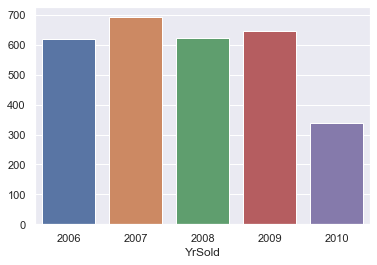

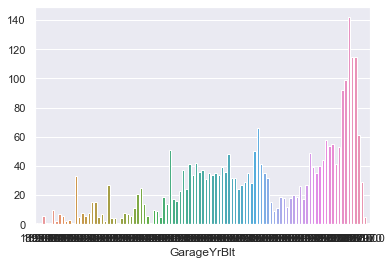

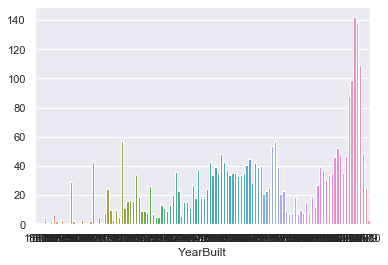

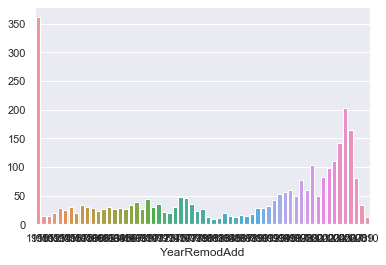

In [29]:
for features in df_temp.columns:
    sns.barplot(df_temp[features].value_counts().index, df_temp[features].value_counts().values,
                                                                                      ci = None)
    plt.xlabel(features)
    plt.show()

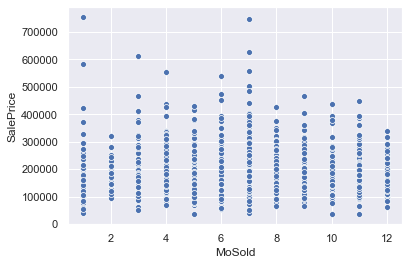

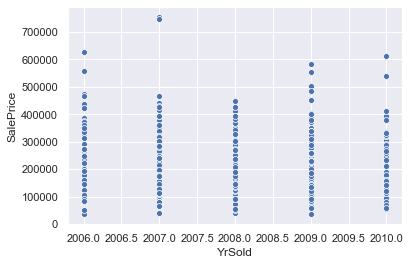

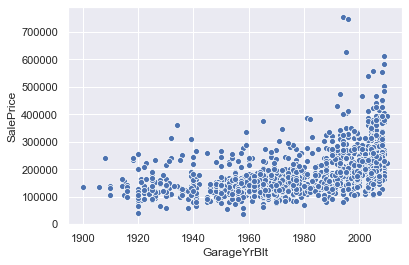

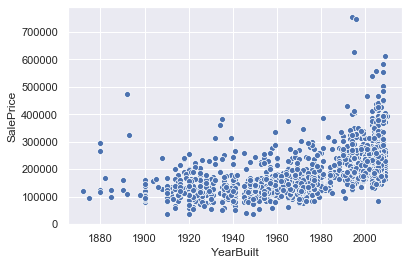

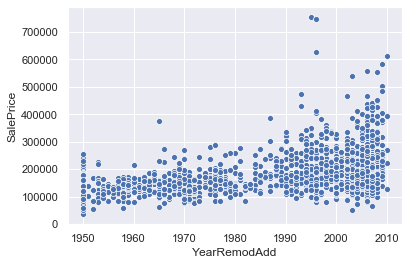

In [30]:
for features in df_temp.columns:
    sns.scatterplot(df[features], df['SalePrice'])
    plt.xlabel(features)
    plt.show()

### Dropping Features and Imputing null values

In [31]:
# drop MiscVal, PoolArea, 3SsnPorch, LowQualFinSF numeric features
house.drop(['MiscVal', 'PoolArea', '3SsnPorch', 'LowQualFinSF'], axis = 1, inplace = True)

In [32]:
# drop Street, Utilities, Condition2, RoofMatl, Heating categorical features
house.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'], axis = 1, inplace = True)

In [33]:
# dropping features with more than 40% null values 
house.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis = 1, inplace = True)

In [34]:
# for numeric features related to Garage or Bsmt fill null values with 0
def gbn(data):
    for features in data.columns:
        if 'Garage' in features or 'Bsmt' in features and data[features].isnull().sum() >= 1:
            if data[features].dtype != 'O':
                data[features].fillna(0, inplace = True)
            else:
                data[features].fillna('None', inplace = True)
        elif data[features].isnull().sum() >= 1 and data[features].dtype != 'O':
            if features in disc:
                data[features].fillna(data[features].value_counts().index[0], inplace = True)
            else:
                data[features].fillna(data[features].median(), inplace = True)
        elif data[features].isnull().sum() >= 1 and data[features].dtype == 'O':
            data[features].fillna(data[features].value_counts().index[0], inplace = True)
gbn(house)

In [35]:
# Converting temporal features
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    house[feature] = house['YrSold'] - house[feature]
house[['YrSold','MoSold','YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head(10)

,YrSold,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt
0,2008,2,5,5,5.0
1,2007,5,31,31,31.0
2,2008,9,7,6,7.0
3,2006,2,91,36,8.0
4,2008,12,8,8,8.0
5,2009,10,16,14,16.0
6,2007,8,3,2,3.0
7,2009,11,36,36,36.0
8,2008,4,77,58,77.0
9,2008,1,69,58,69.0


In [36]:
con.pop(0)

'Id'

# Log Transformation of numeric features
for features in con:
    house[features] = np.log(house[features] + 1)
    plt.hist(house[features])
    plt.xlabel(features)
    plt.show()

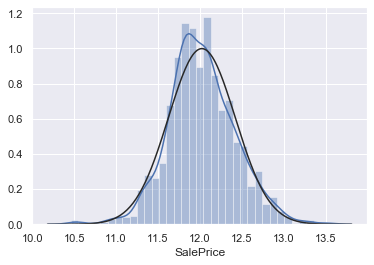

In [37]:
# Normalizing target feature
from scipy import stats
y = np.log(y)
sns.distplot(y,fit=stats.norm)
plt.show()

In [38]:
# Convert numeric features with less than 2% unique values to categorical
for features in house.columns:
        if house[features].nunique()/len(house) * 100 < 2:
            house[features] = house[features].astype(str)
            

In [39]:
# Encoding categorical features
for features in house.columns:
    if house[features].dtype == 'O':
        encoding = house.groupby(features).size()
        encoding = encoding/len(house)
        house[features] = house[features].map(encoding)

In [40]:
house.shape

(2919, 65)

In [41]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition
0,0.196985,0.777321,65.0,8450,0.636862,0.898253,0.73073,0.951696,0.091470,0.860226,...,0.909215,0.904762,0,61,0,0,0.045564,0.213087,0.865365,0.822885
1,0.369647,0.777321,80.0,9600,0.636862,0.898253,0.02912,0.951696,0.008222,0.056184,...,0.909215,0.904762,298,0,0,0,0.134978,0.237067,0.865365,0.822885
2,0.196985,0.777321,68.0,11250,0.331620,0.898253,0.73073,0.951696,0.091470,0.860226,...,0.909215,0.904762,0,42,0,0,0.054128,0.213087,0.865365,0.822885
3,0.043851,0.777321,60.0,9550,0.331620,0.898253,0.17506,0.951696,0.035286,0.860226,...,0.909215,0.904762,0,35,272,0,0.045564,0.212059,0.865365,0.065091
4,0.196985,0.777321,84.0,14260,0.331620,0.898253,0.02912,0.951696,0.024323,0.860226,...,0.909215,0.904762,192,84,0,0,0.035629,0.213087,0.865365,0.822885


### Modelling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = house[:1460]
test = house[1460:]
robscal = preprocessing.RobustScaler()
X = robscal.fit_transform(X)
test = robscal.fit_transform(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [64]:
def rmse_cv(model):
    kf_splits = KFold(n_splits = 10, random_state=42, shuffle=True).get_n_splits(X_train)
    rmse_score = np.abs(np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf_splits, n_jobs=-1,
                                                 scoring='neg_mean_squared_error')))
    return np.array(rmse_score)

In [45]:
lasso_reg = Lasso(alpha = 0.0005, random_state = 42)
print('RMSE on Lasso {}'.format(rmse_cv(lasso_reg).mean()))

RMSE on Lasso 0.16570083860701007


In [46]:
ridge_reg = Ridge(alpha = 0.0005, solver = 'cholesky', random_state = 42)
print('RMSE on Ridge: {}'.format(rmse_cv(ridge_reg).mean()))

RMSE on Ridge: 0.1673278898816836


In [47]:
elasticnet_reg = ElasticNet(alpha = 0.0005, l1_ratio = 0.5, random_state = 42)# mix of l1,l2 penalty
elasticnet_reg.fit(X_train, y_train)
print('RMSE on ElasticNet: {}'.format(rmse_cv(elasticnet_reg).mean()))

RMSE on ElasticNet: 0.16638592151829665


In [48]:
knn_r = KNeighborsRegressor()
print('RMSE on Kneighbors: {}'.format(rmse_cv(knn_r).mean()))

RMSE on Kneighbors: 0.24056121747175832


In [49]:
# Support Vector Machine for Regression
svm_r = SVR(C=1, kernel='linear')
print('RMSE on SVM_Reg: {}'.format(rmse_cv(svm_r).mean()))

RMSE on SVM_Reg: 0.1631497858320788


# Decision Tree Regressor
param_grid = {
    'criterion' : ('mse', 'friedman_mse', 'mae', 'poisson'),
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' :  [2, 5, 10, 20],
    'max_leaf_nodes' : [5, 10, 20, 100]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10, verbose = 3, n_jobs = -1)
grid_dt.fit(X_train, y_train)

grid_dt.best_estimator_

In [50]:
dt_r = DecisionTreeRegressor(criterion='mae', max_leaf_nodes=100,
                      min_samples_leaf=10)
print('RMSE on DT_Reg: {}'.format(rmse_cv(dt_r).mean()))

RMSE on DT_Reg: 0.18199677854400562


# Random Forest
param_grid = {
    'criterion' : ('mse', 'mae'),
    'min_samples_split' : [5, 10],
    'min_samples_leaf' :  [5, 10, 20, 40],
    'max_leaf_nodes' : [10, 50, 100],
    'max_features'   : ('auto', 'sqrt', 'log2'),
    'bootstrap'      : (True, False)
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10, verbose = 3, n_jobs = -1)
grid_rf.fit(X_pca, y_train)

grid_rf.best_estimator_

In [51]:
random_forest_r = RandomForestRegressor(max_leaf_nodes=100,
                      min_samples_leaf=5, min_samples_split=5)
print('RMSE on Random_Forest_Reg: {}'.format(rmse_cv(random_forest_r).mean()))

RMSE on Random_Forest_Reg: 0.15037621858080316


# Gradient Boosting Regressor
param_grid = {
    'loss' : ('ls', 'lad', 'huber', 'quantile'),
    'n_estimators' : [50, 100, 125],
    'learning_rate' : [0.1, 0.05, 0.02],
    'criterion' : ('friedman_mse', 'mse', 'mae'),
    'max_features': ('auto', 'sqrt', 'log2')
}
grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 10, verbose = 3, n_jobs = -1)
grid_gb.fit(X_pca, y_train)

grid_gb.best_estimator_

In [52]:
gradient_boost_r = GradientBoostingRegressor(criterion='mse', loss='huber', max_features='log2',
                          n_estimators=125)
print('RMSE on Gradient_Boosting_Reg: {}'.format(rmse_cv(gradient_boost_r).mean()))

RMSE on Gradient_Boosting_Reg: 0.13468861866173912


# XG Boost
param_grid = {
    'n_estimators' : [50, 100, 130],
    'learning_rate' : [0.1, 0.01, 0.05, 0.07 ],
    'max_depth' : [5, 8, 10],
    'min_child_weight' : [1]
}
grid_xgb = GridSearchCV(XGBRegressor(), param_grid, cv = 10, verbose = 3, n_jobs = -1)
grid_xgb.fit(X_pca, y_train)

grid_xgb.best_estimator_

In [53]:
xgboost_r = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=130, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
print('RMSE on XG_Boost_Reg: {}'.format(rmse_cv(xgboost_r).mean()))

RMSE on XG_Boost_Reg: 0.13625870859307435


# Lightgbm regressor
param_grid = {
    'learning_rate' : [0.1, 0.01, 0.05, 0.07],
    'n_estimators' : [50, 100, 130, 200],
    'reg_alpha' : [0, 0.5, 1, 2, 5, 10],
    'reg_lambda' : [0, 0.5, 1, 5, 10, 20]
}
grid_lgb = GridSearchCV(lgb.LGBMRegressor(), param_grid, cv = 10, verbose = 3, n_jobs = -1)
grid_lgb.fit(X_train, y_train)

grid_lgb.best_estimator_

In [65]:
lgb_r = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=130, reg_alpha=0, reg_lambda=1)
lgb_r.fit(X_train, y_train)
print('RMSE on XG_Boost_Reg: {}'.format(rmse_cv(lgb_r).mean()))

RMSE on XG_Boost_Reg: 0.13102020674089931


We are getting least RMSE on LGBMRegressor. Let's check it on test data.

In [66]:
from sklearn.metrics import r2_score
y_pred = lgb_r.predict(X_test)
RMSE = np.sqrt( mean_squared_error(y_test, y_pred))
print('RMSE on test set is {}'.format(RMSE))
R_squared = r2_score(y_test, y_pred)
print('R_squared on test set is',R_squared)

RMSE on test set is 0.14536770723312709
R_squared on test set is 0.8867618460622719


In [67]:
test_pred = lgb_r.predict(test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_predict = np.exp(test_pred)
submission['SalePrice'] = test_predict
submission.head()

,Id,SalePrice
0,1461,132200.151717
1,1462,164686.373634
2,1463,190866.353687
3,1464,200934.944797
4,1465,188590.788011


In [59]:
submission.to_csv("final1.csv", index = False, header = True)